In [1]:
# imports
import pandas as pd
import sqlite3

# connect to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

In [8]:
pd.options.display.max_columns = None

follow along from this tutorial:
https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1

Data Source: http://www.seanlahman.com/baseball-archive/statistics/

In [3]:
# querying database for all seasons where a team played 150 or more games and is still active
query = '''
SELECT *
FROM Teams
INNER JOIN TeamsFranchises
ON Teams.franchID == TeamsFranchises.franchID
WHERE Teams.G >= 150 and TeamsFranchises.active == 'Y';

'''

# create dataframe from query
Teams = conn.execute(query).fetchall()

In [9]:
# convert Teams to DataFrame
teams_df = pd.DataFrame(Teams)
teams_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [10]:
# add column names to the dataframe, 
# from: http://www.seanlahman.com/files/database/readme2016.txt
cols = ['yearID','lgID','teamID','franchID','divID',
        'Rank','G','Ghome','W','L','DivWin','WCWin',
        'LgWin','WSWin','R','AB','H','2B','3B','HR',
        'BB','SO','SB','CS','HBP','SF','RA','ER','ERA',
        'CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
        'E','DP','FP','name','park','attendance','BPF',
        'PPF','teamIDBR','teamIDlahman45','teamIDretro',
        'franchID','franchName','active','NAassoc']

teams_df.columns = cols

teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [13]:
teams_df.shape

(2287, 52)

In [14]:
# Dropping unnecesary column variables as well as those derived from the 
# target column Wins.
drop_cols = ['lgID','franchID','divID','Rank','Ghome',
             'L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF',
             'teamIDBR','teamIDlahman45','teamIDretro',
             'franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis=1)

df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


In [15]:
df.isnull().sum()

yearID       0
teamID       0
G            0
W            0
R            0
AB           0
H            0
2B           0
3B           0
HR           0
BB           0
SO         110
SB           0
CS         419
HBP       1777
RA           0
ER           0
ERA          0
CG           0
SHO          0
SV           0
IPouts       0
HA           0
HRA          0
BBA          0
SOA          0
E            0
DP          22
FP           0
dtype: int64

In [16]:
# drop columns with null values
# caught stealing and hit-by-pitch
df = df.drop(['CS', 'HBP'], axis=1)

In [17]:
# fill null values with median
# strikeouts and double plays
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

In [18]:
# check null values
df.isnull().sum()

yearID    0
teamID    0
G         0
W         0
R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

In [19]:
# import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

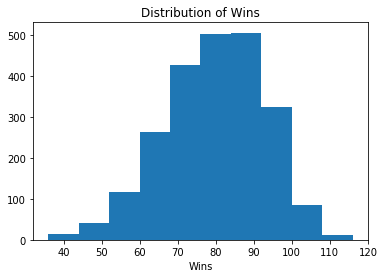

In [20]:
# distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [38]:
# create bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5


In [40]:
# create win_bins column
df['win_bins'] = df['W'].apply(assign_win_bins)

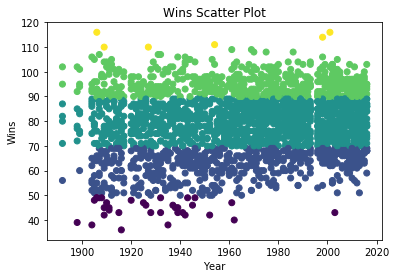

In [41]:
# scatter plot of Year vs Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [42]:
# filter for years greater than 1900
df[df['yearID'] > 1900]

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3
5,1966,CAL,162,80,604,5360,1244,179,54,122,525,1062.0,80,643,576,3.56,31,12,40,4371,1364,136,511,836,136,186.0,0.979,3
6,1967,CAL,161,84,567,5307,1265,170,37,114,453,1021.0,40,587,507,3.19,19,14,46,4290,1246,118,525,892,111,135.0,0.982,3
7,1968,CAL,162,67,498,5331,1209,170,33,83,447,1080.0,62,615,548,3.43,29,11,31,4311,1234,131,519,869,140,156.0,0.977,2
8,1969,CAL,163,71,528,5316,1221,151,29,88,516,929.0,54,652,566,3.54,25,9,39,4314,1294,126,517,885,135,164.0,0.978,3
9,1970,CAL,162,86,631,5532,1391,197,40,114,447,922.0,69,630,565,3.48,21,10,49,4386,1280,154,559,922,127,169.0,0.980,3
